<a href="https://colab.research.google.com/github/ZUYNOUZAMAKI/Decision-Tree-Implementation/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing** the Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


**Loading** the **Breast-Cancer Dataset**

In [10]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print("Dataset Shape:", X.shape)
X.head()


Dataset Shape: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Target Labels**

In [11]:
data.target_names


array(['malignant', 'benign'], dtype='<U9')

**Train-Test Split**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


**Training** the Decision Tree

In [13]:
dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

**Making Predictions & Calculation of Accuracy**

In [15]:
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9440559440559441


**Classification Report**

In [16]:
print(classification_report(y_test, y_pred, target_names=data.target_names))


              precision    recall  f1-score   support

   malignant       0.92      0.92      0.92        53
      benign       0.96      0.96      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



**Visualization** of the Decision Tree

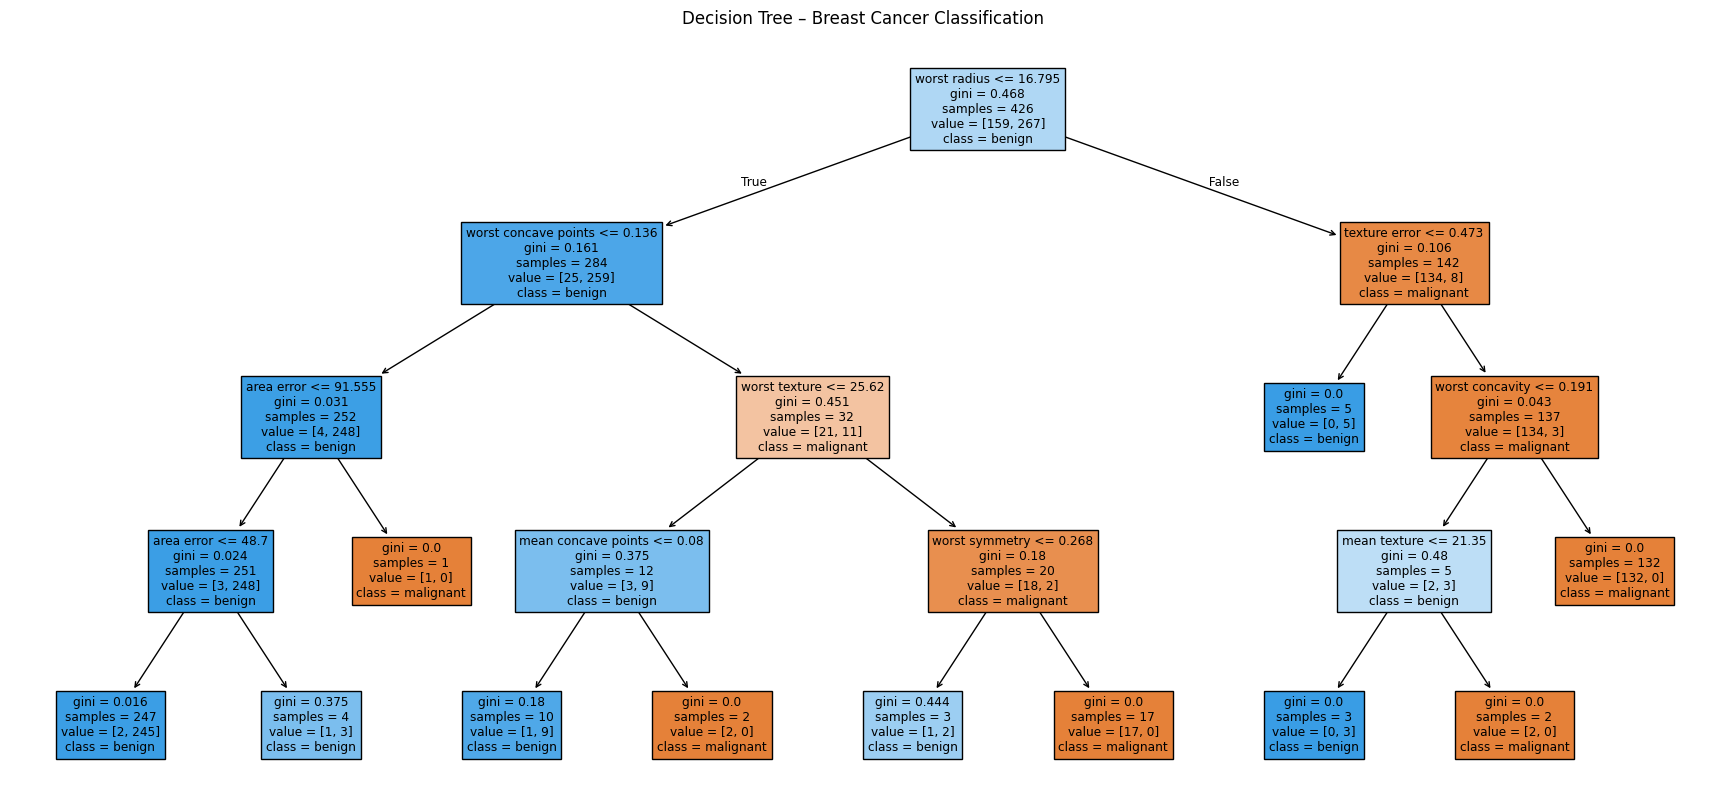

In [18]:
plt.figure(figsize=(22, 10))

plot_tree(
    dt_model,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True
)

plt.title("Decision Tree – Breast Cancer Classification")
plt.show()


**Confusion Matrix**

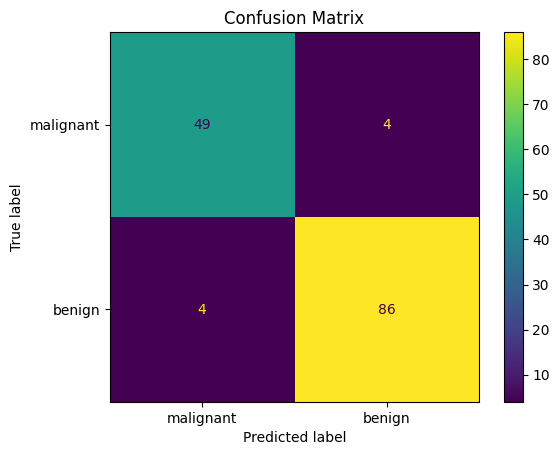

In [17]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=data.target_names
)

disp.plot()
plt.title("Confusion Matrix")
plt.show()


**Feature Importance** Analysis

In [19]:
feature_importance = pd.Series(
    dt_model.feature_importances_,
    index=data.feature_names
).sort_values(ascending=False)

feature_importance.head(10)


,0
worst radius,0.726829
worst concave points,0.122113
texture error,0.048398
worst texture,0.033231
worst concavity,0.018188
mean concave points,0.014158
area error,0.012613
mean texture,0.012585
worst symmetry,0.011885
mean area,0.000000
